In [1]:
##analyze the Hk results
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from matplotlib.font_manager import FontProperties
##for RFAC_2layer
depths = [1,2,3,4,5,6,7,8,9]
ks = [1.9, 2.1, 2.3, 2.5, 2.7, 2.9]
ndepth = len(depths)
nk = len(ks)
results = np.zeros([nk,ndepth,4])
noise_tag = "sn"
save_filename = f"Hk_result_52_10_pws2_Hk_result.npz"

for i in range(ndepth):
    depth = depths[i]
    for j in range(nk):
        k = ks[j]
        result_file = f"synthetic_data_S1.0/Varyp_sediment_crust_mantle_synthetics_c35_ks{k}_dt0.01/sediments_depth{depth}/{save_filename}"
        data_RFAC = np.load(result_file)
        Hs2 = data_RFAC['Hs_optimal'][0]
        Ks2 = data_RFAC['Ks_optimal'][0]
        Hm2 = data_RFAC['Hs_optimal'][1]
        Km2 = data_RFAC['Ks_optimal'][1]
        results[j,i,0] = Hs2
        results[j,i,1] = Ks2
        results[j,i,2] = Hm2
        results[j,i,3] = Km2


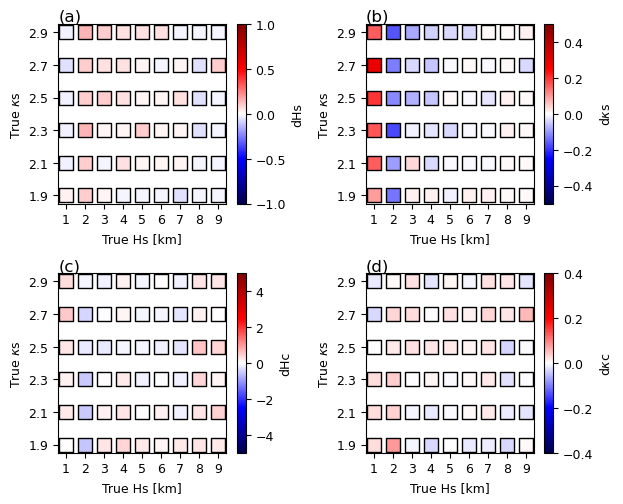

In [2]:
from matplotlib.pyplot import tight_layout
plt.rcParams.update({"font.size":9})

fig, axs = plt.subplots(2,2,figsize=(16/2.54,13/2.54),tight_layout=True)
biass = np.zeros_like(results)
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
makersize = 100
#for k in sedimentary
norm = Normalize(vmin=-0.5,vmax=0.5)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        vpvs = ks[j]
        result = results[j,k,1]-vpvs
        biass[j,k,1]=result 
        axs[0,1].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

fig.colorbar(cmap,ax=axs[0,1],location='right',label=r"d$\kappa$s")
axs[0,1].set_xticks(depths)
axs[0,1].set_yticks(ks)
axs[0,1].set_xlabel("True Hs [km]")
axs[0,1].set_ylabel(r"True $\kappa$s")
xmin,xmax = axs[0,1].get_xlim()
ymin,ymax = axs[0,1].get_ylim()
axs[0,1].text(xmin,ymax,"(b)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")
#for H in sedimentary
norm = Normalize(vmin=-1,vmax=1)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        result = results[j,k,0]-depth
        biass[j,k,0]=result 
        axs[0,0].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

fig.colorbar(cmap,ax=axs[0,0],location='right',label="dHs")
axs[0,0].set_xticks(depths)
axs[0,0].set_yticks(ks)
axs[0,0].set_xlabel("True Hs [km]")
axs[0,0].set_ylabel(r"True $\kappa$s")
xmin,xmax = axs[0,0].get_xlim()
ymin,ymax = axs[0,0].get_ylim()
axs[0,0].text(xmin,ymax,"(a)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")
#for k in crust
norm = Normalize(vmin=-0.4,vmax=0.4)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        result = results[j,k,3]-1.75
        biass[j,k,3]=result 
        axs[1,1].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

fig.colorbar(cmap,ax=axs[1,1],location='right',label=r"d$\kappa$c")
axs[1,1].set_xticks(depths)
axs[1,1].set_yticks(ks)
axs[1,1].set_xlabel("True Hs [km]")
axs[1,1].set_ylabel(r"True $\kappa$s")
xmin,xmax = axs[1,1].get_xlim()
ymin,ymax = axs[1,1].get_ylim()
axs[1,1].text(xmin,ymax,"(d)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")
#for h in crust
norm = Normalize(vmin=-5,vmax=5)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        result = results[j,k,2]-35
        biass[j,k,2]=result 
        axs[1,0].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

fig.colorbar(cmap,ax=axs[1,0],location='right',label="dHc")
axs[1,0].set_xticks(depths)
axs[1,0].set_yticks(ks)
# axs[1,0].set_xlabel("True Hs [km]")
# axs[1,0].set_ylabel(r"True $\kappa$s")
axs[1,0].set_xlabel("True Hs [km]")
axs[1,0].set_ylabel(r"True $\kappa$s")
# axs[1,0].set_title("Sub-sediment Crustal Thickness")
xmin,xmax = axs[1,0].get_xlim()
ymin,ymax = axs[1,0].get_ylim()
axs[1,0].text(xmin,ymax,"(c)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")

plt.savefig("Figures_new/HkVp_2layer_results_52_10.jpg",dpi=900)


from matplotlib.pyplot import tight_layout
plt.rcParams.update({"font.size":9})
##chinese labels
fig, axs = plt.subplots(2,2,figsize=(16/2.54,13/2.54),tight_layout=True)
biass = np.zeros_like(results)
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
makersize = 100
#for k in sedimentary
norm = Normalize(vmin=-0.5,vmax=0.5)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        vpvs = ks[j]
        result = results[j,k,1]-vpvs
        biass[j,k,1]=result 
        axs[0,1].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

figcolorbar = fig.colorbar(cmap,ax=axs[0,1],location='right')
figcolorbar.set_label(label="沉积层Vp/Vs估计误差",font=zhfont1)
axs[0,1].set_xticks(depths)
axs[0,1].set_yticks(ks)
axs[0,1].set_xlabel("沉积层厚度[km]",font=zhfont1)
axs[0,1].set_ylabel("沉积层Vp/Vs",font=zhfont1)
xmin,xmax = axs[0,1].get_xlim()
ymin,ymax = axs[0,1].get_ylim()
axs[0,1].text(xmin,ymax,"(b)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")
#for H in sedimentary
norm = Normalize(vmin=-1,vmax=1)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        result = results[j,k,0]-depth
        biass[j,k,0]=result 
        axs[0,0].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

figcolorbar = fig.colorbar(cmap,ax=axs[0,0],location='right')
figcolorbar.set_label(label="沉积层厚度估计误差[km]",font=zhfont1)
axs[0,0].set_xticks(depths)
axs[0,0].set_yticks(ks)
axs[0,0].set_xlabel("沉积层厚度[km]",font=zhfont1)
axs[0,0].set_ylabel("沉积层Vp/Vs",font=zhfont1)
xmin,xmax = axs[0,0].get_xlim()
ymin,ymax = axs[0,0].get_ylim()
axs[0,0].text(xmin,ymax,"(a)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")
#for k in crust
norm = Normalize(vmin=-0.4,vmax=0.4)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        result = results[j,k,3]-1.75
        biass[j,k,3]=result 
        axs[1,1].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

figcolorbar = fig.colorbar(cmap,ax=axs[1,1],location='right')
figcolorbar.set_label(label="沉积层Vp/Vs估计误差",font=zhfont1)
axs[1,1].set_xticks(depths)
axs[1,1].set_yticks(ks)
axs[1,1].set_xlabel("沉积层厚度[km]",font=zhfont1)
axs[1,1].set_ylabel("沉积层Vp/Vs",font=zhfont1)
xmin,xmax = axs[1,1].get_xlim()
ymin,ymax = axs[1,1].get_ylim()
axs[1,1].text(xmin,ymax,"(d)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")
#for h in crust
norm = Normalize(vmin=-5,vmax=5)
cmap = ScalarMappable(norm=norm,cmap='seismic')
for k in range(ndepth):
    depth = depths[k]
    for j in range(nk):
        result = results[j,k,2]-35
        biass[j,k,2]=result 
        axs[1,0].scatter(depths[k],ks[j],s=makersize,marker='s',color=cmap.to_rgba(result),edgecolors='black')

figcolorbar = fig.colorbar(cmap,ax=axs[1,0],location='right')
figcolorbar.set_label(label="下伏地壳厚度估计误差",font=zhfont1)
axs[1,0].set_xticks(depths)
axs[1,0].set_yticks(ks)
axs[1,0].set_xlabel("沉积层厚度[km]",font=zhfont1)
axs[1,0].set_ylabel("沉积层Vp/Vs",font=zhfont1)
# axs[1,0].set_title("Sub-sediment Crustal Thickness")
xmin,xmax = axs[1,0].get_xlim()
ymin,ymax = axs[1,0].get_ylim()
axs[1,0].text(xmin,ymax,"(c)",fontsize=12,horizontalalignment="left",verticalalignment="bottom")

plt.savefig("Figures/Hk_results_error_57_cohf_chineselabels.jpg",dpi=900)